# Movie Review Classification
This is Keras Movie Review

In [57]:
from keras.datasets import imdb

In [58]:
(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [59]:
train_labels[2]

0

In [60]:
train_data[4]
# len(train_data[4])


[1,
 249,
 1323,
 7,
 61,
 113,
 10,
 10,
 13,
 1637,
 14,
 20,
 56,
 33,
 2401,
 18,
 457,
 88,
 13,
 2626,
 1400,
 45,
 3171,
 13,
 70,
 79,
 49,
 706,
 919,
 13,
 16,
 355,
 340,
 355,
 1696,
 96,
 143,
 4,
 22,
 32,
 289,
 7,
 61,
 369,
 71,
 2359,
 5,
 13,
 16,
 131,
 2073,
 249,
 114,
 249,
 229,
 249,
 20,
 13,
 28,
 126,
 110,
 13,
 473,
 8,
 569,
 61,
 419,
 56,
 429,
 6,
 1513,
 18,
 35,
 534,
 95,
 474,
 570,
 5,
 25,
 124,
 138,
 88,
 12,
 421,
 1543,
 52,
 725,
 6397,
 61,
 419,
 11,
 13,
 1571,
 15,
 1543,
 20,
 11,
 4,
 2,
 5,
 296,
 12,
 3524,
 5,
 15,
 421,
 128,
 74,
 233,
 334,
 207,
 126,
 224,
 12,
 562,
 298,
 2167,
 1272,
 7,
 2601,
 5,
 516,
 988,
 43,
 8,
 79,
 120,
 15,
 595,
 13,
 784,
 25,
 3171,
 18,
 165,
 170,
 143,
 19,
 14,
 5,
 7224,
 6,
 226,
 251,
 7,
 61,
 113]

In [61]:
max([max(s) for s in train_data])

9999

In [62]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(v,k) for (k,v) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[2]])

In [63]:
decoded_review

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

## All the movie reviews are different length, convert them into one big vector by one hot encoding

<p>each review will be 10000 x len(review) dimention vector, only index word is mark as 1 and else will be 0</p>

In [67]:
import numpy as np

def vectorization(review, dimension=10000):
    vector = np.zeros((len(review), dimension))
    for i,review in enumerate(review):
        vector[i,review] = 1
    return vector

x_train = vectorization(train_data)
x_test = vectorization(test_data)

In [65]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [66]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [32]:
train_labels[0]

1

## Convert Output data also in array, currently it is scalar value

In [34]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [36]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


### Use binary_crossentropy to calculate error
rmsprop is mean_squared_error for probablity use binary_crossentropy

In [37]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
len(x_train)

25000

In [54]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [55]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])

In [56]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 92us/step - loss: 2.0631e-05 - acc: 1.0000 - val_loss: 1.4697 - val_acc: 0.8576
Epoch 2/20
15000/15000 [==============================] - 1s 80us/step - loss: 3.4850e-06 - acc: 1.0000 - val_loss: 1.4954 - val_acc: 0.8593
Epoch 3/20
15000/15000 [==============================] - 1s 79us/step - loss: 1.3871e-06 - acc: 1.0000 - val_loss: 1.5087 - val_acc: 0.8581
Epoch 4/20
15000/15000 [==============================] - 1s 79us/step - loss: 8.7567e-07 - acc: 1.0000 - val_loss: 1.5358 - val_acc: 0.8590
Epoch 5/20
15000/15000 [==============================] - 1s 79us/step - loss: 5.8627e-07 - acc: 1.0000 - val_loss: 1.5472 - val_acc: 0.8574
Epoch 6/20
15000/15000 [==============================] - 1s 79us/step - loss: 3.2757e-07 - acc: 1.0000 - val_loss: 1.5588 - val_acc: 0.8580
Epoch 7/20
15000/15000 [==============================] - 1s 79us/step - loss: 2.3541e-07 - acc: 1.0000 

KeyboardInterrupt: 

## After training model, lets plot training vs validation loss

In [52]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_value = history_dict['loss']
val_loss_val = history_dict['val_loss']
acc = history_dict['acc']
epoch = range(1,len(acc) + 1)

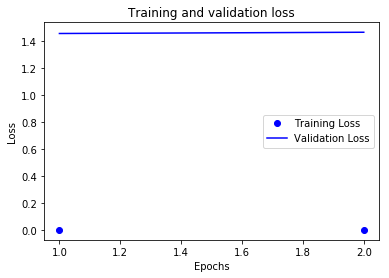

In [53]:
plt.plot(epoch,loss_value,'bo',label="Training Loss")
plt.plot(epoch,val_loss_val,'b',label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()